<h1>Описание проекта</h1>
Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Открытие файла с данными и изучение общей информации

In [135]:
import pandas as pd
import numpy as np

df = pd.read_csv('/datasets/games.csv')
display(df.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-info">
<b>Комментарий:</b><br>
Сразу заметны следующие недочеты:<br>
• Неверный тип данных столбца Year_of_Release.<br>
• Неверный тип данный столбца Critic_Score.<br>
• Присутствуют буквы разных регистров в названиях столбцов.
</div>

## Подготовка данных

### Замена названий столбцов (приведение к нижнему регистру)

In [137]:
df.columns = map(str.lower, df.columns)

### Преобразование данных в нужные типы и обработка пропусков

In [138]:
# Приведение столбца year_of_release к типу int
# Пропусков в столбце year_of_release. Их меньше 2%. Возможно год не указан или игра не выпущена. Удалим пропуски
print(df['year_of_release'].isna().sum())
df = df.dropna(subset=['year_of_release'])

df['year_of_release'] = df['year_of_release'].astype(int)

269


In [139]:
print(df['genre'].isna().sum())
df = df.dropna(subset=['genre'])

2


In [144]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [145]:
# user_score стал строкой после замены значения tbd. Приводим обратно к float
df['user_score'] = df['user_score'].astype(float)
#df['user_score'] = df['user_score'].fillna(df.apply(user_score_mean, axis=1))
df['user_score'] = df['user_score'].apply(lambda x: f"{x:.1f}")
# Тип снова сметился на строку. Меняем на float
df['user_score'] = df['user_score'].astype(float)

In [146]:
# Заменим пустые значение рейтинга игр на NR, что означает No rating.
df['rating'] = df['rating'].fillna('NR')

In [147]:
# Дубликатов явных нет
print('Дубликатов явных до удаления:', df.duplicated().sum()) 

Дубликатов явных до удаления: 0


In [148]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.reset_index(drop=True)
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NR,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NR,28.31


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Вывод:
<div class="alert alert-info">
<b>Комментарий:</b><br>
• Заменены названия столбцов.<br>
• Данные преобразованы в нужные типа.<br>
• Пропуски обработаны.<br>
• Посчитана суммарная продажа каждой игры по всем регионам. Данные внесены в столбец all_sales.
</div>

## Проведение исследовательского анализа данных

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [150]:
display(df.groupby('year_of_release')['name'].agg(['count']))

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

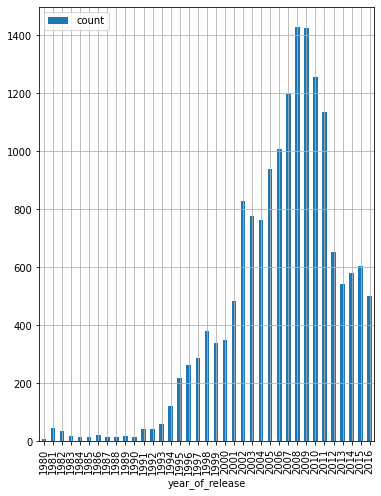

In [151]:
df.groupby('year_of_release')['name'].agg(['count']).plot.bar(
    rot=90, figsize=(6, 8), grid=True)

<div class="alert alert-info">
<b>Комментарий:</b><br>
Данные за все периоды неважны. Нас интересуют последние пару лет.
</div>

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [152]:
# Просмотрим какие вообще платформы представленны в дф
print(df['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [153]:
# Как менялись продажи по платформам
display(df.groupby(['platform', 'year_of_release'])['name'].agg(['count']).head(15))

count
platform year_of_release       
2600     1980                 9
         1981                46
         1982                36
         1983                11
         1984                 1
         1985                 1
         1986                 2
         1987                 6
         1988                 2
         1989                 2
3DO      1994                 1
         1995                 2
3DS      2011               116
         2012                93
         2013                91

In [154]:
# Найдем Топ-5 платформ по продажам
df_top_platform = df.groupby('platform')['all_sales'].agg(['sum'])
df_top_platform = df_top_platform.sort_values(by='sum', ascending=False).head(5)
display(df_top_platform)

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


<AxesSubplot:title={'center':'PS2'}, xlabel='year_of_release'>

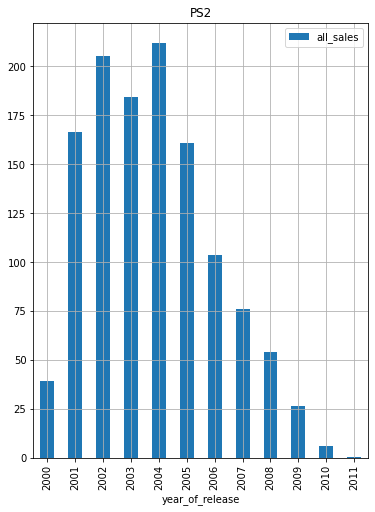

In [155]:
# Построим распределение по годам для каждой платформы из топа
# PS2
#df_ps2 = df[df['platform'] == 'PS2'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum')
import matplotlib.pyplot as plt
df[df['platform'] == 'PS2'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot.bar(
    rot=90, figsize=(6, 8), grid=True, title='PS2')


<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

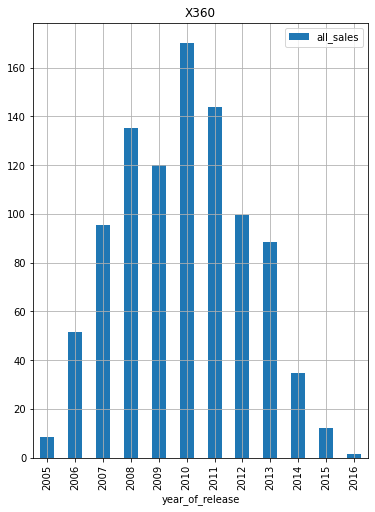

In [156]:
# X360
df[df['platform'] == 'X360'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot.bar(
    rot=90, figsize=(6, 8), grid=True, title='X360')

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

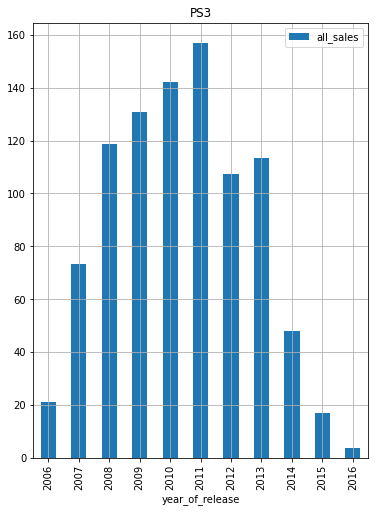

In [157]:
# PS3
df[df['platform'] == 'PS3'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot.bar(
    rot=90, figsize=(6, 8), grid=True, title='PS3')

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

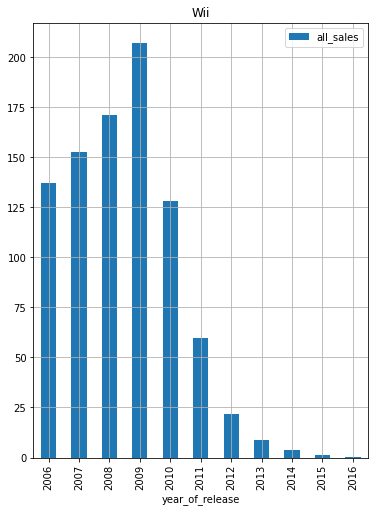

In [158]:
# Wii
df[df['platform'] == 'Wii'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot.bar(
    rot=90, figsize=(6, 8), grid=True, title='Wii')

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

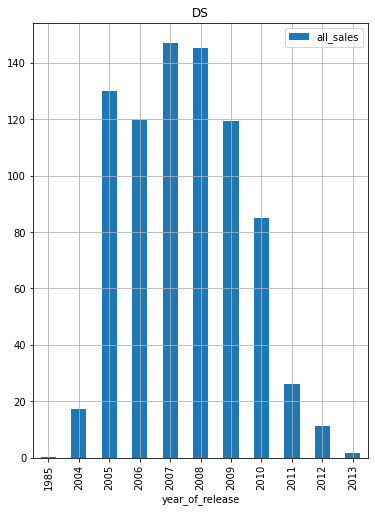

In [159]:
# DS
df[df['platform'] == 'DS'].pivot_table(index='year_of_release', values='all_sales', aggfunc='sum').plot.bar(
    rot=90, figsize=(6, 8), grid=True, title='DS')

<div class="alert alert-info">
<b>Комментарий:</b><br>
Найдены топ-5 платформ по суммарным продажам и построены графики по этим параметрам.
</div>

In [160]:
# Количество лет, в течение которых каждая платформа была актуальна.
df_platform_count = df[['platform', 'year_of_release', 'name']]
df_platform_count= df_platform_count.groupby(
    ['platform', 'year_of_release'], as_index=False).agg({'name': 'count'}).reset_index(drop=True)
del df_platform_count['name']
df_platform_count=df_platform_count.groupby('platform')['year_of_release'].agg('count')
print(df_platform_count)

platform
2600    10
3DO      2
3DS      6
DC       7
DS      11
GB      13
GBA      8
GC       7
GEN      5
GG       1
N64      7
NES     12
NG       4
PC      26
PCFX     1
PS      10
PS2     12
PS3     11
PS4      4
PSP     12
PSV      6
SAT      6
SCD      2
SNES    10
TG16     1
WS       3
Wii     11
WiiU     5
X360    12
XB       9
XOne     4
Name: year_of_release, dtype: int64


In [161]:
# Тк PC всегда актуальная платформа, то посчитает среднее количество актуальных лет для остальных платформ. 
# Будем считать это за средний срок "жизни" платформы
df_platform_count.drop(labels=['PC'])
print(f'Средняя продолжительноть "жизни" платформы равна {df_platform_count.mean():.2f} лет')

Средняя продолжительноть "жизни" платформы равна 7.68 лет


<div class="alert alert-info">
<b>Комментарий:</b><br>
В среднем каждые 7.68 лет новая платформа приобретает и теряет свою актуальность. Не учитывалась платформа PC
</div>

### Взятие данных за соответствующий актуальный период.

<div class="alert alert-info">
<b>Комментарий:</b><br>
Т.к. из временных данных нам предоставлены лишь года (без разбивки года на месяцы), то я беру для анализа последние 3 года (2014-2016) для отслеживания изменения. По одному 2016г (без разбивки) невозможно увидеть растут или падают продажи и тд.
</div>

In [162]:
# Создание дф с актуальными данными для дальнейшего прогнозирования.
df_actual = df.query('year_of_release in [2014, 2015, 2016]').reset_index(drop=True)
display(df_actual.head(10))
df_2016 = df.query('year_of_release == 2016')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NR,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NR,7.98
5,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NR,7.55
8,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NR,7.39
9,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


### Выбор нескольких потенциально прибыльных платформ.

In [163]:
# Выясним топ продаж по платформам
df_actual_top_platform = df_actual.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc=('sum'))
display(df_actual_top_platform)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:xlabel='year_of_release'>

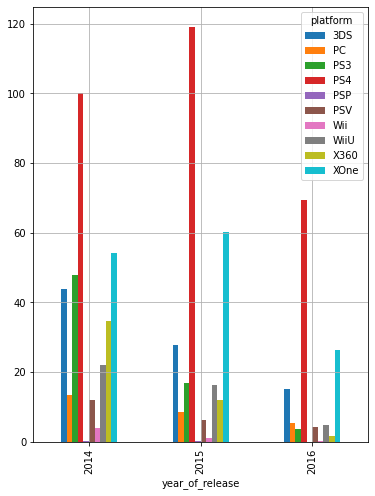

In [164]:
df_actual_top_platform.plot.bar(
    rot=90, figsize=(6, 8), grid=True,)

<div class="alert alert-info">
<b>Комментарий:</b><br>
В сводной таблице представлены продажи на различных платформах по годам.<br>
По данным заметно снижение количества продаж по каждой платформе.<br>
</div>

<div class="alert alert-info">
<b>Комментарий V2:</b><br>
В Японии могут быть популярны платформы, которые не пользуются успехом в других регионах. Не будем учитывать этот факт.<br>
Можно смело отбросить платформы Wii и PSP, тк очень мало продаж по этим платформам и они стремятся к 0.<br>
</div>

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

<AxesSubplot:title={'center':'all_sales'}, xlabel='[platform]'>

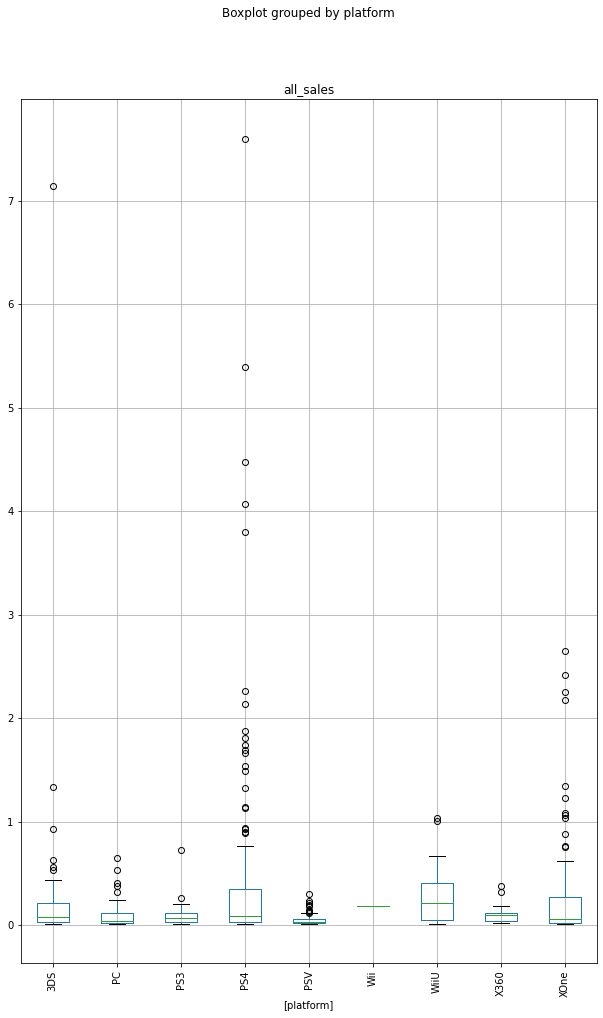

In [165]:
# Построение "ящика с усами" за интересующий нас 2016г
df_2016.boxplot(column=['all_sales'], by=['platform'], rot=90, figsize=(10,16), grid=True)

<div class="alert alert-info">
<b>Комментарий:</b><br>
Был построен график "ящик с усами" за 2016г по всем платформам.<br>
По данным заметно большое количество аномалий у таких платформ, как PC, PS4, PSV и XOne.<br>
</div>

<div class="alert alert-info">
<b>Комментарий V2:</b><br>
Показанные выбросы появляются, возможно, в результате некорректного заполнения таблицы.<br>
Судя по чему строится график, можно предположить, что выбросами являются игры с очень большим количеством продаж.<br>
</div>

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

<div class="alert alert-info">
<b>Комментарий V2:</b><br>
Возьму следующие пару платформ, помимо PS4 и рассмотрю за весь период 2014-2016.<br>
Судя по чему строится график, можно предположить, что выбросами являются игры с очень большим количеством продаж.<br>
</div>

              all_sales  critic_score  user_score
all_sales      1.000000      0.402661   -0.040132
critic_score   0.402661      1.000000    0.546434
user_score    -0.040132      0.546434    1.000000


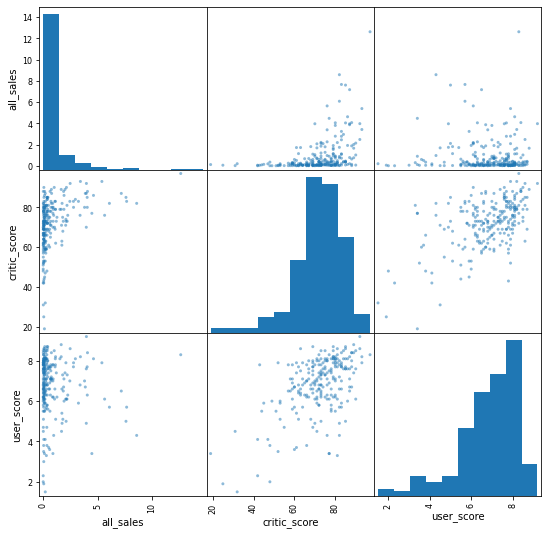

In [166]:
# Возьмем для рассмотрения самую популярную платформу за 2014-2016 года - PS4 
df_actual_ps4 = df_actual.query('platform == "PS4"')
print(df_actual_ps4[['all_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(df_actual_ps4[['all_sales', 'critic_score', 'user_score']], figsize=(9, 9), grid=True)
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b><br>
• Наблюдается больше продаж при рейтинге критиков от 60 до 80. Пользователей от 6.<br>
На количество продаж в большую сторону влияют оценки критиков. При этом оценки пользователей практически не оказывают влияние на рост продаж.
</div>

              all_sales  critic_score  user_score
all_sales      1.000000      0.314117    0.215193
critic_score   0.314117      1.000000    0.862485
user_score     0.215193      0.862485    1.000000


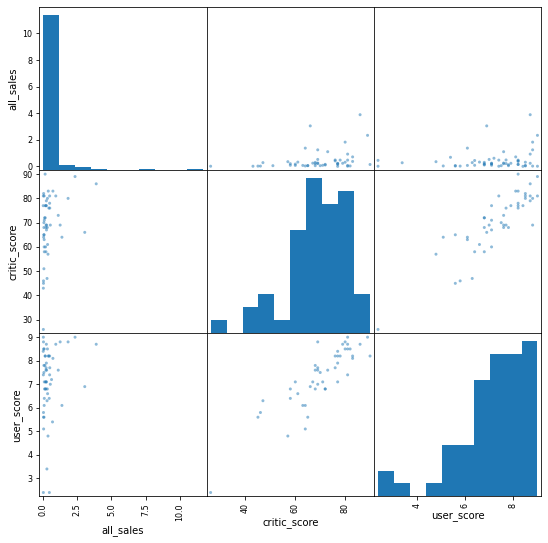

In [167]:
# Возьмем для рассмотрения 3DS
df_actual_3ds = df_actual.query('platform == "3DS"')
print(df_actual_3ds[['all_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(df_actual_3ds[['all_sales', 'critic_score', 'user_score']], figsize=(9, 9), grid=True)
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b><br>
• Наблюдается больше продаж при рейтинге критиков от 60 до 80. Пользователей от 7<br>
На количество продаж в большую сторону в почти равной степени влияют оценки критиков и пользователей.
</div>

              all_sales  critic_score  user_score
all_sales      1.000000      0.174634   -0.071597
critic_score   0.174634      1.000000    0.466099
user_score    -0.071597      0.466099    1.000000


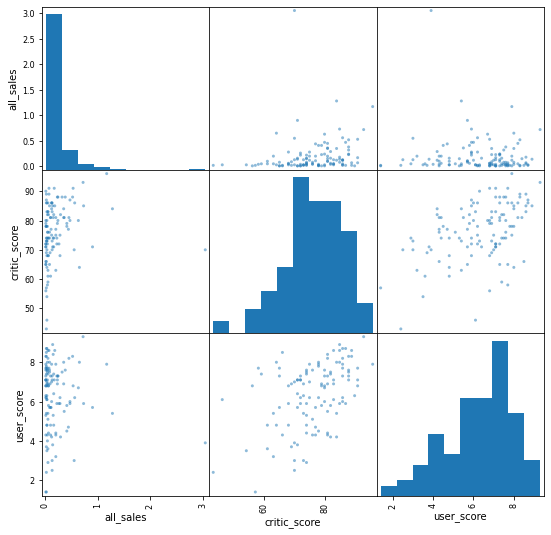

In [168]:
# Возьмем для рассмотрения PC
df_actual_pc = df_actual.query('platform == "PC"')
print(df_actual_pc[['all_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(df_actual_pc[['all_sales', 'critic_score', 'user_score']], figsize=(9, 9), grid=True)
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b><br>
На количество продаж оценки пользователей и критиков особо не влияют.
</div>

              all_sales  critic_score  user_score
all_sales      1.000000      0.446575   -0.166761
critic_score   0.446575      1.000000    0.693445
user_score    -0.166761      0.693445    1.000000


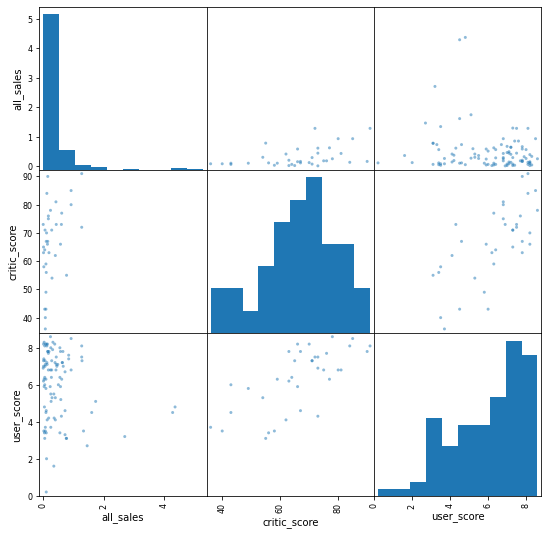

In [169]:
# Возьмем для рассмотрения PS3
df_actual_ps3 = df_actual.query('platform == "PS3"')
print(df_actual_ps3[['all_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(df_actual_ps3[['all_sales', 'critic_score', 'user_score']], figsize=(9, 9), grid=True)
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b><br>
На количество продаж в большую сторону влияют оценки критиков. При этом оценки пользователей практически не оказывают влияние на рост продаж.
</div>

              all_sales  critic_score  user_score
all_sales      1.000000      0.525723   -0.138445
critic_score   0.525723      1.000000    0.625309
user_score    -0.138445      0.625309    1.000000


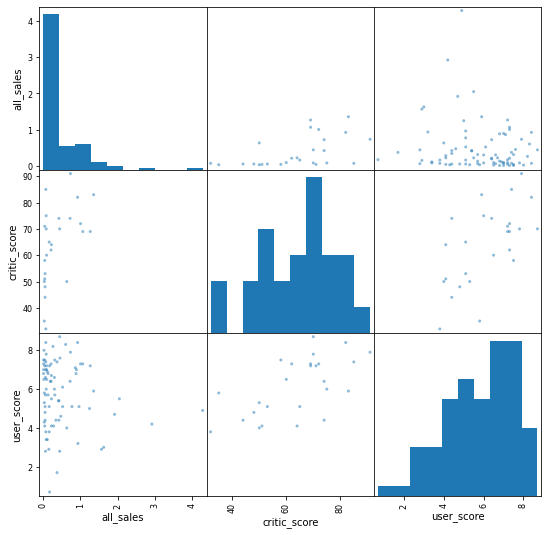

In [170]:
# Возьмем для рассмотрения X360
df_actual_x360 = df_actual.query('platform == "X360"')
print(df_actual_x360[['all_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(df_actual_x360[['all_sales', 'critic_score', 'user_score']], figsize=(9, 9), grid=True)
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b><br>
На количество продаж сильно влияют оценки критиков.
</div>

              all_sales  critic_score  user_score
all_sales      1.000000      0.428677   -0.070384
critic_score   0.428677      1.000000    0.440977
user_score    -0.070384      0.440977    1.000000


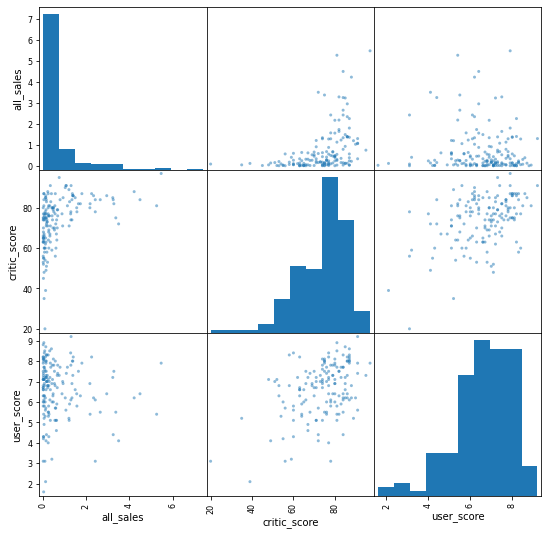

In [171]:
# Возьмем для рассмотрения XOne
df_actual_xone = df_actual.query('platform == "XOne"')
print(df_actual_xone[['all_sales', 'critic_score', 'user_score']].corr())
pd.plotting.scatter_matrix(df_actual_xone[['all_sales', 'critic_score', 'user_score']], figsize=(9, 9), grid=True)
plt.show()

<div class="alert alert-info">
<b>Комментарий:</b><br>
• Наблюдается больше продаж при рейтинге критиков от 60 до 80. Пользователей от 6.<br>
На количество продаж в большую сторону влияют оценки критиков. При этом оценки пользователей практически не оказывают влияние на рост продаж.
</div>

### Распределение игр по жанрам

In [172]:
print(df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [173]:
df_genre_game = df.query('year_of_release in [2014, 2015, 2016]')[['genre', 'all_sales']].reset_index(drop=True)
df_genre_game = df_genre_game.groupby('genre')['all_sales'].agg(['mean','median'])
df_genre_game = df_genre_game.sort_values(by='genre')
display(df_genre_game)

,mean,median
genre,,
Action,0.322068,0.090
Adventure,0.094865,0.030
Fighting,0.470333,0.125
Misc,0.332301,0.090
Platform,0.476053,0.140
Puzzle,0.157857,0.045
Racing,0.398841,0.090
Role-Playing,0.459005,0.110
Shooter,1.335469,0.515


<div class="alert alert-info">
<b>Комментарий:</b><br>
Поскольку могут встретиться так называемые звезды или игры с низкими продажами, то правильнее будет взять медианное значение.<br>
Наиболее успешными жанрами являются: Shooter и Sports.<br>
Наименее успешные: Adventure и Puzzle.

</div>

## Составление портрета пользователя каждого региона

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Доля продаж игр на PS4 34.71%
Доля продаж игр на XOne 28.61%
Доля продаж игр на 3DS 7.97%
Доля продаж игр на WiiU 6.82%
Доля продаж игр на PC 2.55%


genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

None

<AxesSubplot:xlabel='rating'>

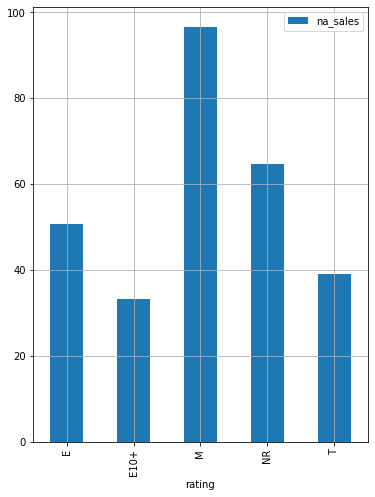

In [174]:
# Регион Северной Америки (NA)
df_na = df_actual.groupby('platform')['na_sales'].agg('sum')

# Топ-5 платформ по продажам игр.
display(df_na.sort_values(ascending=False).head(5))

print(f'Доля продаж игр на PS4 {df_na["PS4"] / df_na.sum():.2%}')
print(f'Доля продаж игр на XOne {df_na["XOne"] / df_na.sum():.2%}')
print(f'Доля продаж игр на 3DS {df_na["3DS"] / df_na.sum():.2%}')
print(f'Доля продаж игр на WiiU {df_na["WiiU"] / df_na.sum():.2%}')
print(f'Доля продаж игр на PC {df_na["PC"] / df_na.sum():.2%}')

# Топ-5 жанров
df_na_genre = df_actual.groupby('genre')['na_sales'].agg('sum')
display(display(df_na_genre.sort_values(ascending=False).head(5)))

# Влияние рейтинга

df_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot.bar(
    rot=90, figsize=(6, 8), grid=True)

<div class="alert alert-info">
<b>Комментарий:</b><br>
• Самой популярной платформой в Северной Америке является PS4. На неё приходится 34.71% продаж.<br>
• Самый популярный жанр - Shooter.<br>
• Наиболее популярными рейтингами игр являются - M и NR (без рейтинга), наименее популярный - E10+.
</div>

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Доля продаж игр на PS4 48.04%
Доля продаж игр на XOne 17.09%
Доля продаж игр на PC 6.64%
Доля продаж игр на 3DS 5.96%
Доля продаж игр на WiiU 4.86%


genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

None

<AxesSubplot:xlabel='rating'>

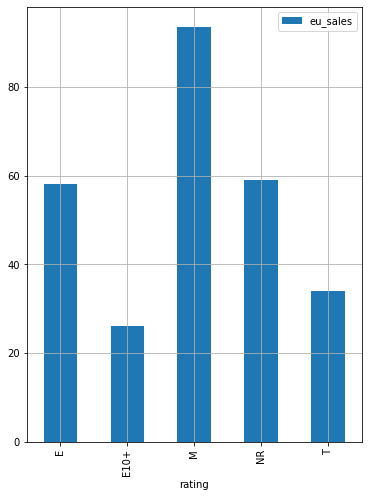

In [175]:
# Регион Европы (EU)
df_eu = df_actual.groupby('platform')['eu_sales'].agg('sum')

# Топ-5 платформ по продажам игр.
display(df_eu.sort_values(ascending=False).head(5))

print(f'Доля продаж игр на PS4 {df_eu["PS4"] / df_eu.sum():.2%}')
print(f'Доля продаж игр на XOne {df_eu["XOne"] / df_eu.sum():.2%}')
print(f'Доля продаж игр на PC {df_eu["PC"] / df_eu.sum():.2%}')
print(f'Доля продаж игр на 3DS {df_eu["3DS"] / df_eu.sum():.2%}')
print(f'Доля продаж игр на WiiU {df_eu["WiiU"] / df_eu.sum():.2%}')

# Топ-5 жанров
df_eu_genre = df_actual.groupby('genre')['eu_sales'].agg('sum')
display(display(df_eu_genre.sort_values(ascending=False).head(5)))

# Влияние рейтинга

df_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot.bar(
    rot=90, figsize=(6, 8), grid=True)

<div class="alert alert-info">
<b>Комментарий:</b><br>
• Самой популярной платформой в Европе является PS4. На неё приходится 48.04% продаж.<br>
• Самый популярный жанр - Action. Недалеко от него идет Shooter.<br>
• Наиболее популярным рейтингом игр является - M, E и NR (без рейтинга), наименее популярный - E10+.
</div>

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

Доля продаж игр на 3DS 47.52%
Доля продаж игр на PS4 16.13%
Доля продаж игр на PSV 15.62%
Доля продаж игр на PS3 12.05%
Доля продаж игр на WiiU 7.85%


genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

None

<AxesSubplot:xlabel='rating'>

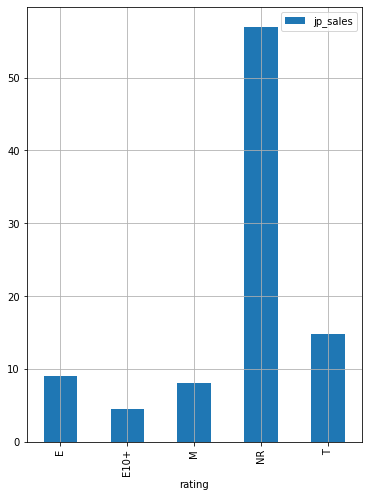

In [176]:
# Регион Япония (JP)
df_jp = df_actual.groupby('platform')['jp_sales'].agg('sum')

# Топ-5 платформ по продажам игр.
display(df_jp.sort_values(ascending=False).head(5))

print(f'Доля продаж игр на 3DS {df_jp["3DS"] / df_jp.sum():.2%}')
print(f'Доля продаж игр на PS4 {df_jp["PS4"] / df_jp.sum():.2%}')
print(f'Доля продаж игр на PSV {df_jp["PSV"] / df_jp.sum():.2%}')
print(f'Доля продаж игр на PS3 {df_jp["PS3"] / df_jp.sum():.2%}')
print(f'Доля продаж игр на WiiU {df_jp["WiiU"] / df_jp.sum():.2%}')

# Топ-5 жанров
df_jp_genre = df_actual.groupby('genre')['jp_sales'].agg('sum')
display(display(df_jp_genre.sort_values(ascending=False).head(5)))

# Влияние рейтинга

df_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot.bar(
    rot=90, figsize=(6, 8), grid=True)

<div class="alert alert-info">
<b>Комментарий:</b><br>
• Самой популярной платформой в Японии является 3DS. На неё приходится 47.52% продаж.<br>
• Самые популярные жанры - Action и Role-Playing.<br>
• Наиболее популярным рейтингом игр является - NR (без рейтинга), а так же T. Наименее популярный - E10+.
</div>

### Вывод:
<div class="alert alert-info">
<b>Комментарий:</b><br>
• В Северной Америке и Европе схожая ситуация. Популярны те же жанры игр и платформы. <br>
• Япония предпочитает другие платформы и жанры игр.<br>
• Во всех регионах предпочитаемым жанром является NR (без рейтинга) или M. В Японии популярны игры с рейтингом T. Менее востребован E10+.
</div>

## Проверка гипотез

### 

<div class="alert alert-info">
<b>Комментарий:</b><br>
Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
Альтернативная гипотеза - Средние пользовательские рейтиги платформ Xbox One и PC различаются.<br>
Это двустороняя гипотеза.
</div>

In [177]:
from scipy import stats as st
test = df_actual.dropna(subset=['user_score']) # Для теста беру дф без пропусков в столбце с оценками пользователей.
alpha = 0.05

results = st.ttest_ind(test.query('platform == "XOne"')['user_score'],
                       test.query('platform == "PC"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


#### Вывод:
<div class="alert alert-info">
<b>Комментарий:</b><br>
Не удалось отвергнуть нулевую гипотезу. Следовательно средние пользовательские рейтинги платформ PC и Xbox One равны.
</div>

### 

<div class="alert alert-info">
<b>Комментарий:</b><br>
Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны.<br>
Альтернативная гипотеза - Средние пользовательские рейтиги платформ жанров Action и Sports различаются.<br>
Это двустороняя гипотеза.
</div>

In [178]:
alpha = 0.05

results = st.ttest_ind(test.query('genre == "Action"')['user_score'], test.query('genre == "Sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


#### Вывод:
<div class="alert alert-info">
<b>Комментарий :</b><br>
Нулевая гипотеза была отвергнута. Следовательно средние пользовательские рейтинги жанров Action и Sports различаются.
</div>

## Вывод:

<div class="alert alert-info">
В ходе выполнения исследования и проверки гипотез можно сделать следующие выводы:<br><br>
    
• Средняя продолжительность "жизни" платформы (без учета PC) равна 7,68 лет.<br>
• За последние пару лет снижается количество выпускаемых игр на ведущих платформах.<br>
• Игроки предпочитают приобретать игры, которые имеют оценку критиков не ниже 60.<br>
• Самой популярным рейтингом является E.<br><br>

• Наиболее популярная платформа в Северной Америке и Европе - PS4. В Японии предпочитают 3DS.<br>
• Любимым жанром игроков в NA и EU является Shooter. Игрокам Японии больше нравятся Action и Role-Playing.<br><br>
    
Были проверены 2 гипотезы:<br>
• О равенстве средних пользовательских оценок на платформах XOne и PC - подтверждена.<br>
• О равенстве средних пользовательских оценок жанров Action и Sports - отвергнута.<br>
    
Наиболее востребоваными играми для всех регионов в целом можно считать игры в жанре Shooter и Action, выпущенных на платформе PS4.    

</div>